In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
import numpy as np
import plotly.graph_objects as go
import spacy
import nltk
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Sample 2_Airbnb_listings.csv')
df_listings=pd.DataFrame(df1,columns=['id','accommodates','price','amenities','neighbourhood_cleansed','review_scores_rating'])
def format_price(colnm):
  return int(float(colnm.replace('$','').replace(',','')))
df_listings['price']=df_listings['price'].apply(format_price)
df_listings.head()

,id,accommodates,price,amenities,neighbourhood_cleansed,review_scores_rating
0,43920083,5,128,"[""Board games"", ""Kitchen"", ""Baby bath"", ""Dishw...",Lambeth,100.0
1,15262253,1,70,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Fir...",Westminster,91.0
2,392246,2,39,"[""Dishwasher"", ""Kitchen"", ""Bed linens"", ""Hange...",Greenwich,99.0
3,30054179,3,85,"[""TV"", ""Essentials"", ""Kitchen"", ""Free parking ...",Lambeth,NaN
4,29098736,1,40,"[""Washer \u2013\u00a0In unit"", ""Bed linens"", ""...",Wandsworth,100.0


In [ ]:
y=df_listings[df_listings['id']==14300858]
y

,id,accommodates,price,amenities,neighbourhood_cleansed,review_scores_rating,amen_as_list,amenities_list
10749,14300858,4,67,"[""Kitchen"", ""Bed linens"", ""Hangers"", ""Smart lo...",Kensington and Chelsea,89.0,"[Kitchen, Bed linens, Hangers, Smart lock, Fir...","[Kitchen, Bed linens, Hangers, Smart lock, Fir..."


In [ ]:
df_listings.shape

(30000, 6)

In [ ]:
df_listings['neighbourhood_cleansed']

0                       Lambeth
1                   Westminster
2                     Greenwich
3                       Lambeth
4                    Wandsworth
                  ...          
29995    Kensington and Chelsea
29996                 Southwark
29997                    Ealing
29998    Kensington and Chelsea
29999                   Hackney
Name: neighbourhood_cleansed, Length: 30000, dtype: object

In [ ]:
df_listings.dtypes

id                          int64
accommodates                int64
price                       int64
amenities                  object
neighbourhood_cleansed     object
review_scores_rating      float64
dtype: object

In [ ]:
df_listings.isnull().sum()
df_listings= df_listings.fillna(0)


In [ ]:
amen = df_listings['amenities'].unique()
import ast
def Lis(x):
    arr = ast.literal_eval(x)
    return arr

Lis("['Hello']")

df_listings['amen_as_list'] = df_listings['amenities'].apply(Lis)
df_listings['amen_as_list']
amenities = {}

for i in df_listings['amen_as_list'].index:
    for j in range(len(df_listings['amen_as_list'][i])):
        if(df_listings['amen_as_list'][i][j] not in amenities):
            amenities[(df_listings['amen_as_list'][i][j])] = 1
        else:
            amenities[(df_listings['amen_as_list'][i][j])] += 1
amenities

{'Board games': 53,
 'Kitchen': 27029,
 'Baby bath': 282,
 'Dishwasher': 7000,
 'Bed linens': 10568,
 'Dining table': 471,
 'Hangers': 23232,
 'Private entrance': 7194,
 'Fire extinguisher': 9665,
 'Bathtub': 2972,
 'Long term stays allowed': 24727,
 'Wine glasses': 436,
 'Wifi': 28564,
 'Carbon monoxide alarm': 17390,
 'Heating': 27857,
 'Essentials': 27355,
 'Washer': 25071,
 'Microwave': 10419,
 'Hair dryer': 19899,
 'Freezer': 1103,
 'Dedicated workspace': 18146,
 'Hot water kettle': 706,
 'Refrigerator': 12387,
 'Iron': 22226,
 'Conditioner': 647,
 'Extra pillows and blankets': 5203,
 'Cooking basics': 11334,
 'Mini fridge': 239,
 'Cleaning before checkout': 862,
 'Oven': 10933,
 'Shampoo': 19150,
 'Hot water': 16991,
 'Lockbox': 3482,
 'Dishes and silverware': 12207,
 'Stove': 9850,
 'Crib': 1248,
 'Shower gel': 2496,
 'TV': 17471,
 'Cleaning products': 484,
 'Luggage dropoff allowed': 4374,
 'Cable TV': 4409,
 'Children’s books and toys for ages 0-2 years old, 2-5 years old, 5-1

In [ ]:
#new_dict = [(key, value) for value, key in amenities.items()]
#dict(new_dict)
new_amen = sorted(amenities.items(), key = lambda x: x[1])

In [ ]:
new_amen[-25:]


[('First aid kit', 9446),
 ('Fire extinguisher', 9665),
 ('Stove', 9850),
 ('Microwave', 10419),
 ('Bed linens', 10568),
 ('Oven', 10933),
 ('Cooking basics', 11334),
 ('Dishes and silverware', 12207),
 ('Refrigerator', 12387),
 ('Dryer', 12922),
 ('Hot water', 16991),
 ('Carbon monoxide alarm', 17390),
 ('TV', 17471),
 ('Dedicated workspace', 18146),
 ('Shampoo', 19150),
 ('Hair dryer', 19899),
 ('Iron', 22226),
 ('Hangers', 23232),
 ('Long term stays allowed', 24727),
 ('Washer', 25071),
 ('Smoke alarm', 25447),
 ('Kitchen', 27029),
 ('Essentials', 27355),
 ('Heating', 27857),
 ('Wifi', 28564)]

In [ ]:
newDict = []
for i in range(15,25):
    newDict.append(new_amen[-50:][i][0])
newDict

['Luggage dropoff allowed',
 'Cable TV',
 'Host greets you',
 'Lock on bedroom door',
 'Extra pillows and blankets',
 'Free parking on premises',
 'Elevator',
 'Coffee maker',
 'Dishwasher',
 'Private entrance']

In [ ]:
dnew = pd.DataFrame()
dnew['scores'] = df_listings['review_scores_rating']
dnew=dnew.fillna(dnew.mean())
dnew

,scores
0,100.0
1,91.0
2,99.0
3,0.0
4,100.0
...,...
29995,80.0
29996,98.0
29997,89.0
29998,94.0


In [ ]:
for i in newDict:
    dnew[i] = 0

dnew

,scores,Luggage dropoff allowed,Cable TV,Host greets you,Lock on bedroom door,Extra pillows and blankets,Free parking on premises,Elevator,Coffee maker,Dishwasher,Private entrance
0,100.0,0,0,0,0,0,0,0,0,0,0
1,91.0,0,0,0,0,0,0,0,0,0,0
2,99.0,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,0
4,100.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,80.0,0,0,0,0,0,0,0,0,0,0
29996,98.0,0,0,0,0,0,0,0,0,0,0
29997,89.0,0,0,0,0,0,0,0,0,0,0
29998,94.0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in df_listings['amen_as_list'].index:
    for j in range(len(df_listings['amen_as_list'][i])):
        if df_listings['amen_as_list'][i][j] in newDict:
            dnew[df_listings['amen_as_list'][i][j]][i] = 1

dnew

,scores,Luggage dropoff allowed,Cable TV,Host greets you,Lock on bedroom door,Extra pillows and blankets,Free parking on premises,Elevator,Coffee maker,Dishwasher,Private entrance
0,100.0,1,1,0,0,1,0,0,0,1,1
1,91.0,1,0,1,1,0,0,1,0,0,0
2,99.0,1,0,0,0,1,1,0,0,1,0
3,0.0,0,0,0,1,0,1,0,0,0,0
4,100.0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,80.0,0,0,0,0,0,0,0,0,0,1
29996,98.0,0,0,0,0,0,1,1,0,0,0
29997,89.0,0,0,0,1,0,0,0,0,0,0
29998,94.0,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etf = ExtraTreesClassifier()

X = dnew.drop(labels = ['scores'], axis = 1)
y = dnew['scores']

etf.fit(X, y)

ExtraTreesClassifier()

In [ ]:
feature_importance = etf.feature_importances_
feature_importance

array([0.09290882, 0.07360652, 0.1445686 , 0.07416643, 0.10811388,
       0.07401   , 0.07242037, 0.1867341 , 0.10457618, 0.06889511])

In [ ]:
for i in range(10):
    feature_importance[i] = feature_importance[i]*100

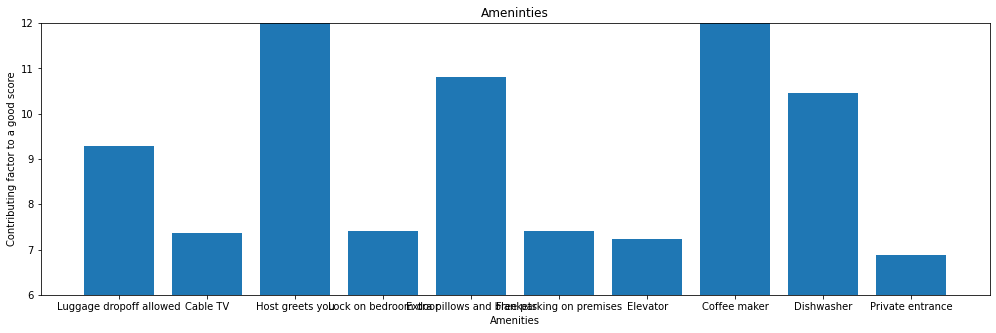

In [ ]:
fig = plt.figure(figsize=(17, 5))
plt.ylim(6,12)
plt.bar(newDict, feature_importance)
plt.xlabel('Amenities')
plt.ylabel('Contributing factor to a good score')
plt.title('Ameninties')
plt.show()

In [ ]:
#remove the NAN values 
df_listings.dropna(how='any',inplace=True)
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      30000 non-null  int64  
 1   accommodates            30000 non-null  int64  
 2   price                   30000 non-null  int64  
 3   amenities               30000 non-null  object 
 4   neighbourhood_cleansed  30000 non-null  object 
 5   review_scores_rating    30000 non-null  float64
 6   amen_as_list            30000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.8+ MB


In [ ]:
df_listings=df_listings[(df_listings['accommodates']<=4)]  
df_listings = df_listings[df_listings['neighbourhood_cleansed'].isin(['Kensington and Chelsea','Westminster'])]
df_listings

,id,accommodates,price,amenities,neighbourhood_cleansed,review_scores_rating,amen_as_list
1,15262253,1,70,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Fir...",Westminster,91.0,"[Kitchen, Host greets you, Hangers, Fire extin..."
5,38738454,4,200,"[""Dishwasher"", ""Kitchen"", ""Bed linens"", ""Hange...",Kensington and Chelsea,100.0,"[Dishwasher, Kitchen, Bed linens, Hangers, Bat..."
6,4815852,2,57,"[""Essentials"", ""Kitchen"", ""Washer"", ""Elevator""...",Westminster,90.0,"[Essentials, Kitchen, Washer, Elevator, Long t..."
12,3338480,2,80,"[""Essentials"", ""Kitchen"", ""Washer"", ""Hair drye...",Westminster,99.0,"[Essentials, Kitchen, Washer, Hair dryer, Hang..."
14,356978,2,42,"[""TV"", ""Essentials"", ""Kitchen"", ""Paid parking ...",Westminster,89.0,"[TV, Essentials, Kitchen, Paid parking off pre..."
...,...,...,...,...,...,...,...
29974,34269677,1,75,"[""Extra pillows and blankets"", ""Essentials"", ""...",Westminster,100.0,"[Extra pillows and blankets, Essentials, TV, K..."
29982,45452509,4,50,"[""Kitchen"", ""Hangers"", ""Private entrance"", ""Lo...",Westminster,100.0,"[Kitchen, Hangers, Private entrance, Long term..."
29991,887283,2,80,"[""Kitchen"", ""Host greets you"", ""Bed linens"", ""...",Kensington and Chelsea,93.0,"[Kitchen, Host greets you, Bed linens, Hangers..."
29995,39646622,2,112,"[""Essentials"", ""Kitchen"", ""Washer"", ""Hair drye...",Kensington and Chelsea,80.0,"[Essentials, Kitchen, Washer, Hair dryer, Hang..."


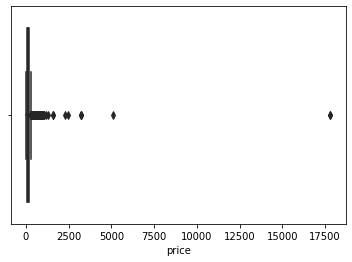

In [ ]:
boxplot = sns.boxplot(x='price',data=df_listings,color='green')

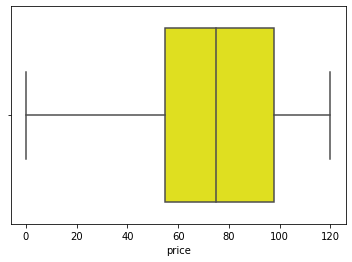

In [ ]:

df_listings_boxplot = df_listings[df_listings['price'] <=120]

boxplot2 = sns.boxplot(x='price', data=df_listings_boxplot, color='yellow')


In [ ]:
df_listings=df_listings[df_listings['price'].between(65,75)]
df_listings.shape[0]

411

In [ ]:
import json
df_listings['amenities_list'] = df_listings['amenities'].apply(lambda y: json.dumps(y))
df_listings[['amenities','amenities_list']].head()


,amenities,amenities_list
1,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Fir...","""[\""Kitchen\"", \""Host greets you\"", \""Hangers\..."
26,"[""TV"", ""Essentials"", ""Kitchen"", ""Washer"", ""Han...","""[\""TV\"", \""Essentials\"", \""Kitchen\"", \""Washe..."
224,"[""TV"", ""Essentials"", ""Kitchen"", ""Cooking basic...","""[\""TV\"", \""Essentials\"", \""Kitchen\"", \""Cooki..."
281,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Pri...","""[\""Kitchen\"", \""Host greets you\"", \""Hangers\..."
408,"[""Dishwasher"", ""Kitchen"", ""Host greets you"", ""...","""[\""Dishwasher\"", \""Kitchen\"", \""Host greets y..."


In [ ]:
import json

def parse_amenities(amenities_json):
    amenities = json.loads(amenities_json)
    return amenities

df_listings['amenities_list'] = df_listings['amenities'].apply(parse_amenities)
df_listings[['amenities', 'amenities_list']].head()

,amenities,amenities_list
1,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Fir...","[Kitchen, Host greets you, Hangers, Fire extin..."
26,"[""TV"", ""Essentials"", ""Kitchen"", ""Washer"", ""Han...","[TV, Essentials, Kitchen, Washer, Hangers, Fir..."
224,"[""TV"", ""Essentials"", ""Kitchen"", ""Cooking basic...","[TV, Essentials, Kitchen, Cooking basics, Wash..."
281,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Pri...","[Kitchen, Host greets you, Hangers, Private en..."
408,"[""Dishwasher"", ""Kitchen"", ""Host greets you"", ""...","[Dishwasher, Kitchen, Host greets you, Hangers..."


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
amenities_binary=mlb.fit_transform(df_listings['amen_as_list'])
amenities_binary

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
x_data=pd.DataFrame(amenities_binary , columns=mlb.classes_,index=df_listings.id)
x_data.head()

,Air conditioning,BBQ grill,Baby monitor,Babysitter recommendations,Backyard,Baking sheet,Barbecue utensils,Bathtub,Bed linens,Body soap,...,TV,TV with Netflix,TV with standard cable,Table corner guards,Toaster,Washer,Waterfront,Wifi,Window guards,Wine glasses
id,,,,,,,,,,,,,,,,,,,,,
15262253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
44129583,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
35185970,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
13969012,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
11289575,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [470]:
x_final=x_data[x_data.columns[x_data.sum()>x_data.sum().mean()]]
df_amenities=pd.DataFrame(x_final.sum())
df_amenities.columns=['counts']
from sklearn.cluster import KMeans
s=KMeans(n_clusters=4).fit_predict(df_amenities['counts'].values.reshape(-1,1))
df_amenities['availability_cluster']=s
df_amenities=df_amenities.sort_values(by=['availability_cluster','counts'],ascending=False)
df_amenities


,counts,availability_cluster
Lock on bedroom door,88,3
Private entrance,85,3
Elevator,83,3
Host greets you,75,3
Hair dryer,308,2
Washer,298,2
Shampoo,290,2
Dedicated workspace,267,2
TV,246,2
Hot water,234,2


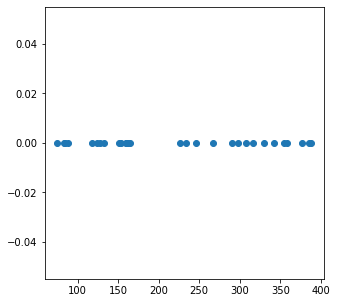

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df_amenities['counts'], np.zeros(df_amenities.shape[0]))
plt.show()


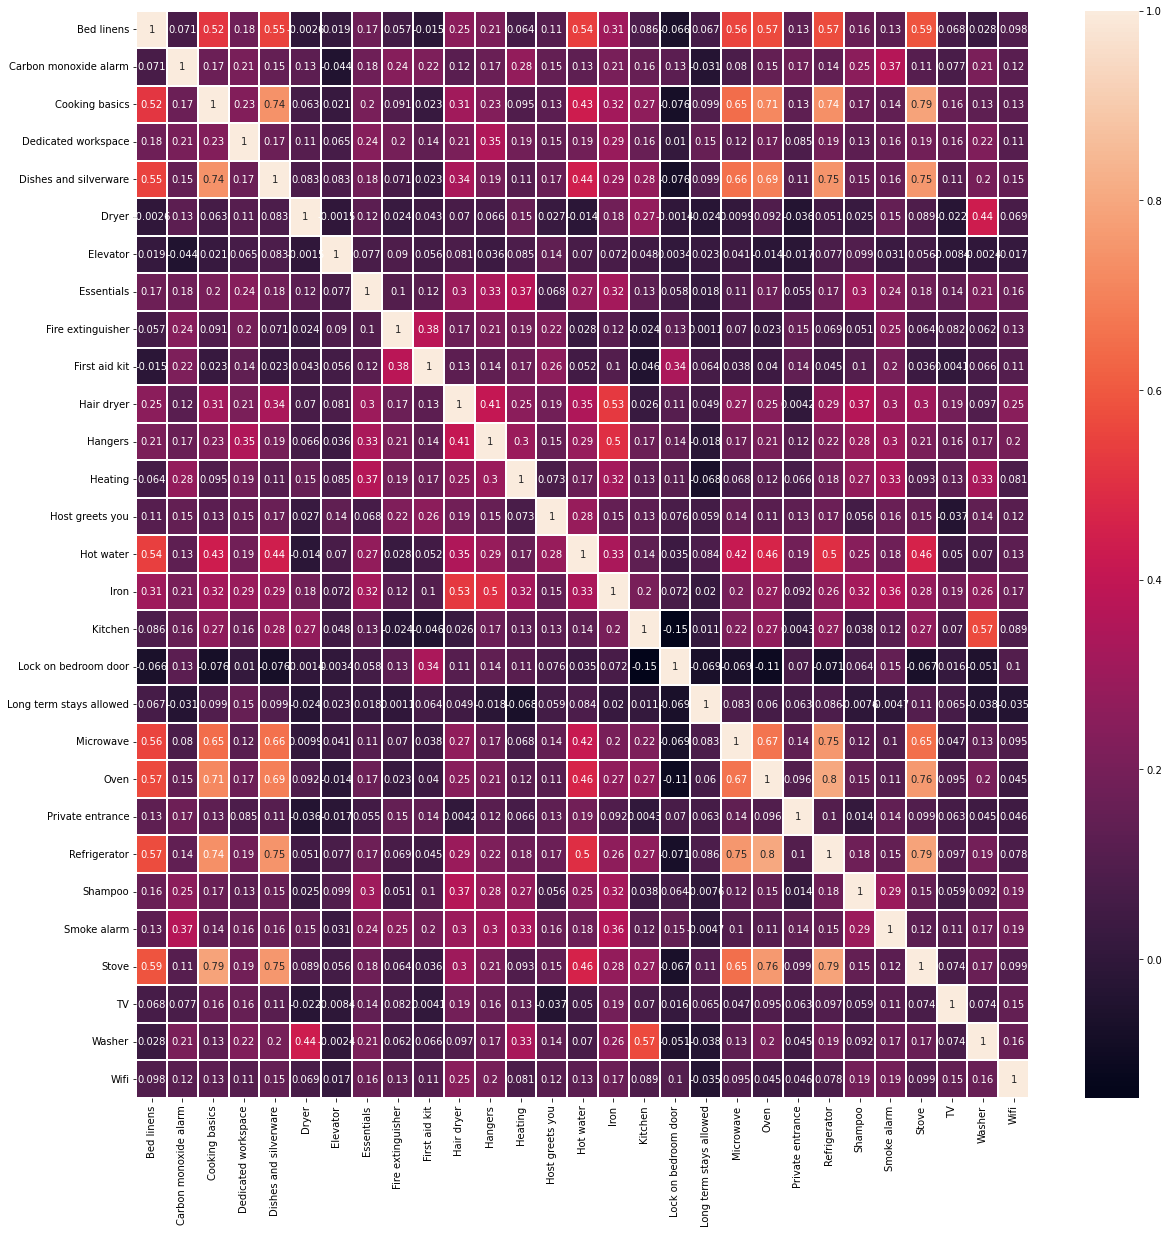

In [ ]:
corr=x_final.corr()
fig=plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidths=1)
plt.show()

In [471]:
xx=x_final.copy()
xx['lessential_amen']=xx['Wifi']+xx['Essentials']+xx['Smoke alarm']+xx['Heating']+xx['Long term stays allowed']+xx['Iron']+xx['Kitchen']
xx['2common_amen']=xx['Shampoo']+xx['Dedicated workspace']+xx['TV']+xx['Carbon monoxide alarm']
xx['3upgraded_amen']=xx['Private entrance']+xx['Elevator']+xx['Host greets you']
xx['4other_amen']=xx['Dryer']+xx['Fire extinguisher']+xx['Cooking basics']+xx['Dishes and silverware']+xx['Refrigerator']+xx['Bed linens']+xx['Stove']++xx['Microwave']+xx['Oven']+xx['First aid kit']
cols=['lessential_amen','2common_amen','3upgraded_amen','4other_amen']
x_reduce=pd.DataFrame(xx,columns=cols)
x_reduce.head()



,lessential_amen,2common_amen,3upgraded_amen,4other_amen
id,,,,
15262253,7,3,2,3
44129583,6,3,0,2
35185970,7,4,0,2
13969012,7,4,3,2
11289575,7,2,1,7


        lessential_amen 2common_amen 3upgraded_amen 4other_amen
                   mean         mean           mean        mean
cluster                                                        
0              5.840304     2.288973       0.498099    1.441065
1              6.668919     2.885135       0.756757    7.250000
           id  lessential_amen  2common_amen  3upgraded_amen  4other_amen  \
143  14300858                7             2               0            7   

     cluster  
143        1  


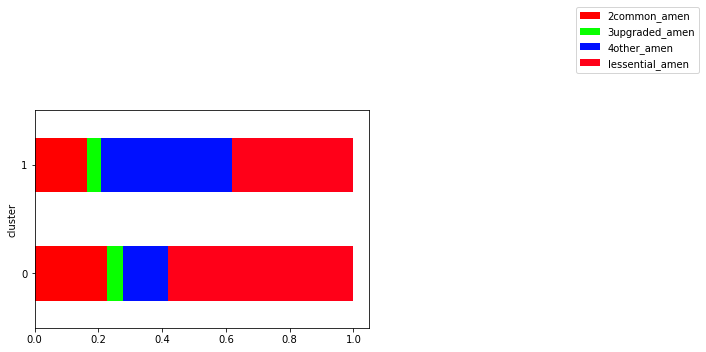

In [472]:
x_final=x_reduce 
from sklearn.cluster import KMeans
x_final.loc[:,'cluster']=KMeans(n_clusters=2).fit_predict(x_final)
pivot_cluster=x_final.pivot_table(index=['cluster'],aggfunc='sum')
pivot_cluster_percentage=pivot_cluster.div(pivot_cluster.sum(axis=1),axis=0)
pivot_cluster_percentage
pivot_cluster_percentage.plot(kind='barh',stacked=True,colormap='hsv')
plt.legend(pivot_cluster_percentage, bbox_to_anchor=(1,0.5,1,1))
x_final=x_final.reset_index()
print(x_final.groupby('cluster')[cols].agg(['mean']))
print(x_final[x_final['id']==y['id'].values[0]])

In [475]:
df2=pd.read_csv('/content/drive/MyDrive/r2.csv')
df2=df2[~df2['comments'].isna()]
df2=df2[df2['listing_id'].isin(df_listings['id'])]
df2.to_csv('/content/drive/MyDrive/r2.csv')

In [476]:
from nltk.stem.snowball import stopwords
import nltk
nltk.download('stopwords')
all_comments=df2['comments'].values
cmts=''
for c in all_comments:
  c=c.lower()
  cmts+=c+''
for ch in '!@#$%^&*,/\][{}|~`><-_;:':
  cmts=cmts.replace(ch,"")
words=cmts.split()
counts={}
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=stopwords.words('english')
for word in words:
  if word not in stopwords:
    counts[word]=counts.get(word,0)+1
items = list(counts.items())
items.sort(key=lambda x:x[1],reverse=True)

items=pd.DataFrame(items)
items=items.rename(columns={0:'Word',1:'Counts'})
items.to_csv('/content/drive/MyDrive/r2.csv')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [477]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
scorer=SentimentIntensityAnalyzer()
comments=df2.comments
def calculate_sentiment(comments):
  return(scorer.polarity_scores(comments)['compound'])
df2.loc[:, 'sentiment'] = df2['comments'].apply(lambda x: calculate_sentiment(x))
reviews=df2.copy()
df2=df2[['listing_id','sentiment']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [478]:
df2=df2.groupby('listing_id')['sentiment'].agg(['mean']).reset_index()
df2=df2.rename(columns={'mean':'sentiment_score'})

In [479]:
neg=reviews[reviews['sentiment']<0]
neg['comments'].to_csv('/content/drive/MyDrive/r2.csv')

In [480]:
print(df2[df2['listing_id']==y['id'].values[0]])
print(df2['sentiment_score'].mean())
print(df2['sentiment_score'].max())
print(df2['sentiment_score'].min())
print(df2['sentiment_score'].std())

    listing_id  sentiment_score
53    14300858         0.637159
0.6687174558907265
0.9942
-0.9646
0.34917876659593544


<function matplotlib.pyplot.show(*args, **kw)>

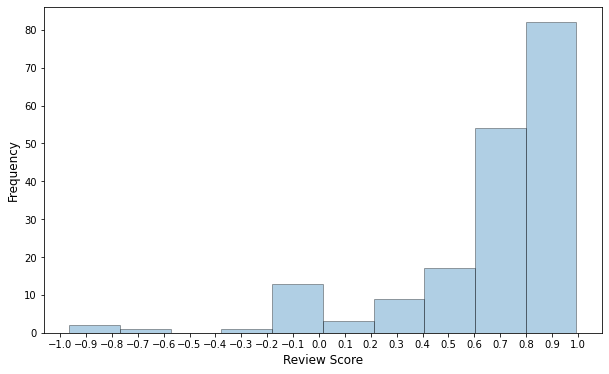

In [481]:
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize=(10,6))
plt.hist(df2['sentiment_score'], edgecolor='k', alpha=0.35)
x_major_locator=MultipleLocator(0.1)
y_major_locator=MultipleLocator(10)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.ylabel('Frequency',fontsize=12)
plt.xlabel('Review Score',fontsize=12)
plt.show

In [482]:
df_score=pd.merge(x_final,df2,left_on='id',right_on='listing_id')
df_score

,id,lessential_amen,2common_amen,3upgraded_amen,4other_amen,cluster,listing_id,sentiment_score
0,15262253,7,3,2,3,0,15262253,0.947300
1,11289575,7,2,1,7,1,11289575,0.697671
2,16447345,7,3,1,5,1,16447345,0.284356
3,28461450,7,3,3,9,1,28461450,0.636000
4,26211449,5,2,1,0,0,26211449,0.617483
...,...,...,...,...,...,...,...,...
177,14958973,7,4,1,7,1,14958973,0.639067
178,14029424,6,3,2,3,0,14029424,0.743843
179,21018261,7,2,1,7,1,21018261,0.200600
180,41658339,7,3,1,10,1,41658339,0.836000


In [483]:
df_score.groupby('cluster')['sentiment_score'].agg(['mean']).reset_index()

,cluster,mean
0,0,0.702564
1,1,0.634871


In [484]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [485]:
Y=df_score['sentiment_score']
X=df_score.drop(columns=['id','listing_id','sentiment_score','cluster'])
X=(X-X.min())/(X.max()-X.min())
X=X.assign(const=1)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        sentiment_score   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8064
Date:                Wed, 11 Jan 2023   Prob (F-statistic):              0.523
Time:                        23:38:06   Log-Likelihood:                -64.607
No. Observations:                 182   AIC:                             139.2
Df Residuals:                     177   BIC:                             155.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
lessential_amen     0.1106      0.183     

In [486]:
y_index=x_final[x_final['id']==y['id'].values[0]].index
y_=(x_final-x_final.min())/(x_final.max()-x_final.min())
y_=y_.loc[y_index,:]
yp=y_.values[0][1:-1]
yp=np.append(yp,1)
model.predict(yp)

array([0.72154408])

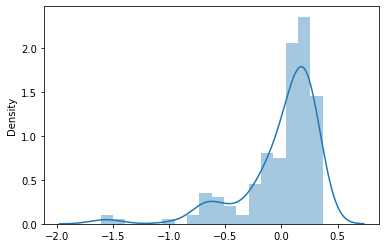

In [487]:
sns.distplot(model.resid)

In [488]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(exog=X.values,exog_idx=i)for i in range(X.shape[1])]
vif_table=pd.DataFrame({'coef_name':X.columns,'vif':np.around(vif,3)})
print(vif_table)

         coef_name     vif
0  lessential_amen   1.477
1     2common_amen   1.340
2   3upgraded_amen   1.074
3      4other_amen   1.245
4            const  28.584


In [489]:
#Price Listing by Neighborhood
df_neighbourhood = pd.DataFrame(df_listings.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=False))
df_neighbourhood = df_neighbourhood.rename(columns = {'price': 'mean_price'})
top_10 = df_neighbourhood.index[:10].tolist()
df_neighbourhood.head(10)

,mean_price
neighbourhood_cleansed,
Westminster,70.400749
Kensington and Chelsea,69.993056


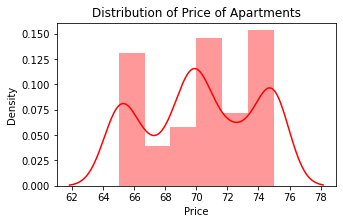

In [490]:
plt.figure(figsize=(5,3))
sns.distplot(df_listings.price,color='r')
plt.xlabel("Price")
plt.title("Distribution of Price of Apartments")
plt.show()